In [8]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import os
import random
import shutil

In [6]:
diretorio = 'dataset/train/non-crack'

In [7]:
origem = 'dataset/train/non-crack/'
destino = 'dataset/train/non-crack_random_subset/'

In [9]:
lista_transferir = os.listdir(diretorio)

In [10]:
len(lista_transferir)

2512

In [7]:
elemento_aleatorio = random.choice(lista_transferir)
elemento_aleatorio

'5100.jpg'

In [11]:
cont = 0
while(cont!=300):
    elemento_aleatorio = random.choice(lista_transferir)
    #os.rename(origem+elemento_aleatorio, destino+elemento_aleatorio)
    shutil.copy(origem+elemento_aleatorio, destino)
    lista_transferir.remove(elemento_aleatorio)
    cont+=1

In [2]:
crack_images_name_list = os.listdir('dataset/train/crack/')
noncrack_images_name_list = os.listdir('dataset/train/non-crack/')

In [3]:
noncrack_images_name_list.remove('labels.txt')

In [4]:
image_width = 256
image_heigth = 256

In [149]:
def brighten_image_if_needed(image, brightness_threshold=150, alpha=1.5, beta=30):
    # Converter a imagem para escala de cinza para calcular o valor médio de intensidade
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray_image)
    
    # Verificar se o valor médio de intensidade está abaixo do limiar
    if mean_brightness < brightness_threshold:
        # Aumentar o valor de brilho da imagem
        brightened_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
        return brightened_image
    else:
        return image

In [150]:
def difference_of_gaussians(image, sigma1, sigma2):
    # Aplicar diferentes níveis de desfoque gaussiano
    blurred1 = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma1)
    blurred2 = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma2)

    # Calcular a Diferença Gaussiana
    dog_image = cv2.absdiff(blurred1, blurred2)
    
    return dog_image

In [151]:
crack_images_list = []
for image_name in crack_images_name_list:
    im = cv2.imread('dataset/train/crack/'+ image_name)
    im_color = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im_resized = cv2.resize(im_color, (image_width, image_heigth))
    im_gamma = brighten_image_if_needed(im_resized, brightness_threshold=120, alpha=1.5, beta=30)
    im_blur = cv2.medianBlur(im_gamma, 3)
    #im_blur = cv2.GaussianBlur(im_resized, (5, 5), 0)
    #im_blur=cv2.bilateralFilter(im_resized,d=13,sigmaColor=75,sigmaSpace=75)
    crack_images_list.append(im_blur)
    
noncrack_images_list = []
for image_name in noncrack_images_name_list:
    im = cv2.imread('dataset/train/non-crack/'+ image_name, cv2.IMREAD_GRAYSCALE)
    im_color = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im_resized = cv2.resize(im_color, (image_width, image_heigth))
    im_gamma = brighten_image_if_needed(im_resized, brightness_threshold=120, alpha=1.5, beta=30)
    im_blur = cv2.medianBlur(im_gamma, 3)
    #im_blur = cv2.GaussianBlur(im_resized, (5, 5), 0)
    #im_blur=cv2.bilateralFilter(im_resized,d=13,sigmaColor=75,sigmaSpace=75)
    noncrack_images_list.append(im_blur)

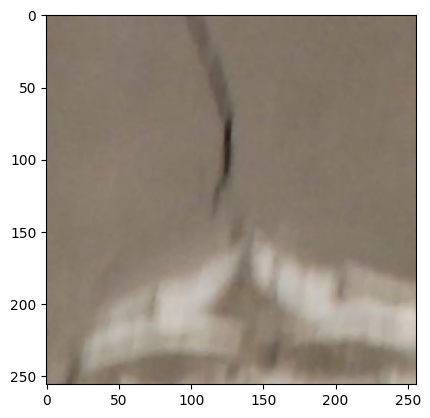

In [153]:
plt.imshow(crack_images_list[0])

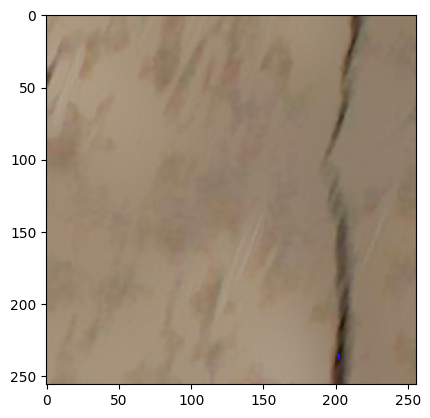

In [183]:
plt.imshow(crack_images_list[299] - difference_of_gaussians(crack_images_list[299], 1,20))

In [184]:
gray_image = cv2.cvtColor(crack_images_list[299] - difference_of_gaussians(crack_images_list[299], 1,10), cv2.COLOR_BGR2GRAY)

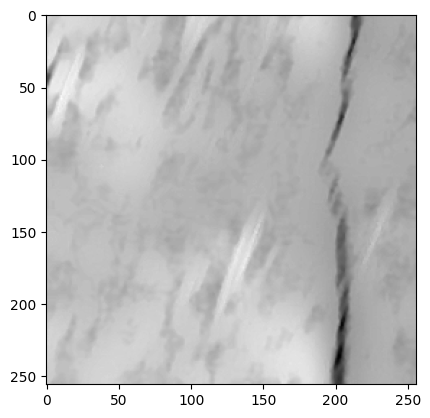

In [185]:
plt.imshow(gray_image,cmap = 'gray')

In [159]:
def segmentacao_niblack(imagem, k):
  def niblack_threshold(image, k):
      media = np.mean(image)
      std = np.std(image)
      threshold = media + k * std
      return threshold
  image_matrix = np.array(imagem)
  limiar = niblack_threshold(image_matrix,k)
  imagem_binaria = np.where(image_matrix>limiar,1,0)

  return imagem_binaria

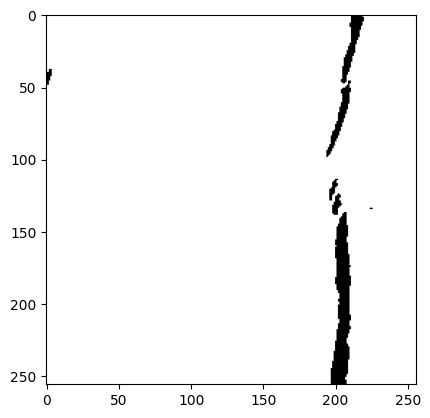

In [194]:
plt.imshow(segmentacao_niblack(gray_image),cmap = 'gray')

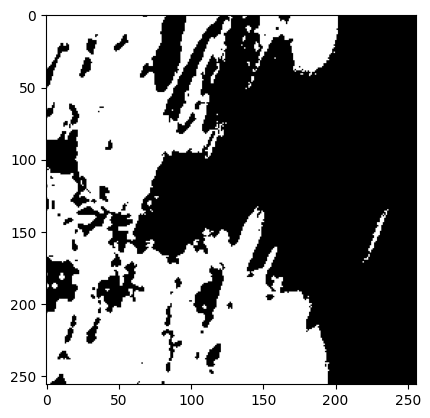

In [198]:
ret, threshold_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(threshold_image,cmap = 'gray')

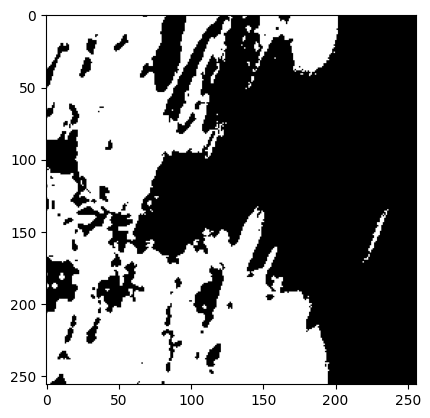

In [200]:
adaptive_threshold_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(threshold_image,cmap = 'gray')

In [186]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
edge_image = cv2.magnitude(sobel_x, sobel_y)

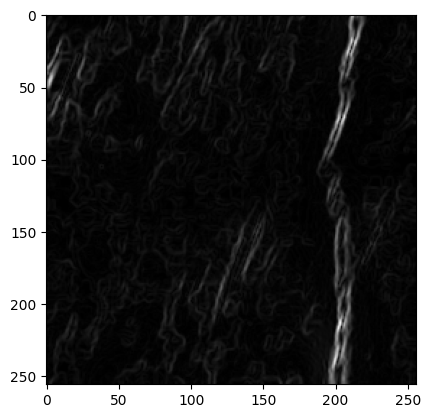

In [187]:
plt.imshow(edge_image,cmap = 'gray')

In [99]:
alpha = 1.5  # Fator de aumento de contraste
beta = 30    # Valor adicionado ao canal de brilho
enhanced_image = cv2.convertScaleAbs(gray_image, alpha=alpha, beta=beta)

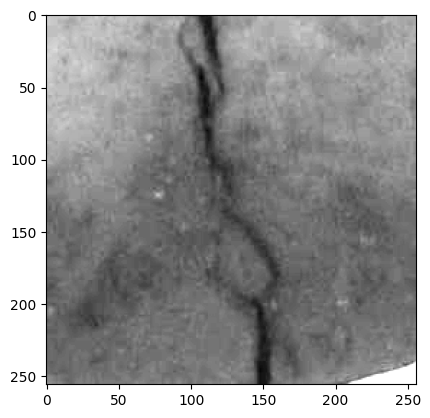

In [100]:
plt.imshow(enhanced_image,cmap = 'gray')

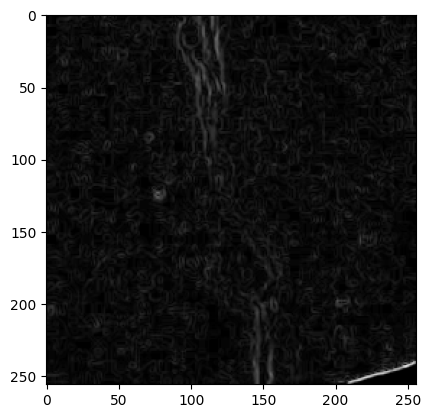

In [101]:
sobel_x = cv2.Sobel(enhanced_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(enhanced_image, cv2.CV_64F, 0, 1, ksize=3)
edge_image = cv2.magnitude(sobel_x, sobel_y)
plt.imshow(edge_image,cmap = 'gray')

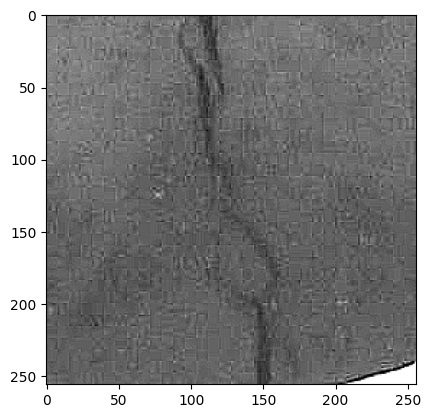

In [102]:
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])
sharpened_image = cv2.filter2D(gray_image, -1, kernel)
plt.imshow(sharpened_image,cmap = 'gray')

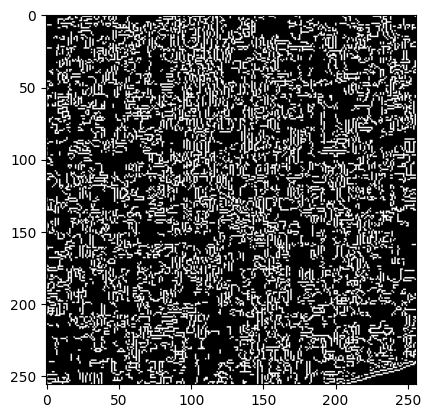

In [103]:
edges = cv2.Canny(sharpened_image, 50, 100)
plt.imshow(edges,cmap = 'gray')

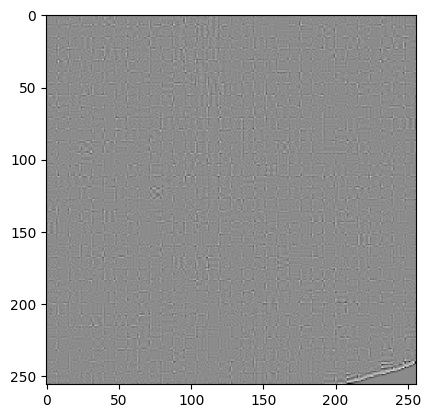

In [104]:
laplacian = cv2.Laplacian(sharpened_image, cv2.CV_64F)
plt.imshow(laplacian,cmap = 'gray')

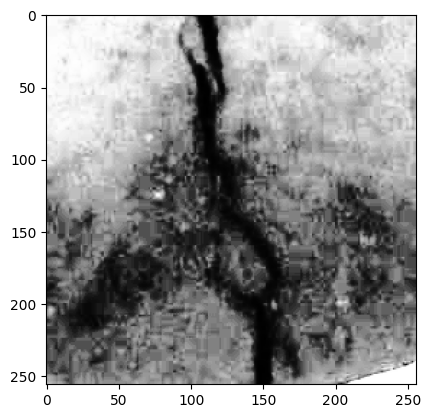

In [105]:
equalized_image = cv2.equalizeHist(gray_image)
plt.imshow(equalized_image,cmap = 'gray')

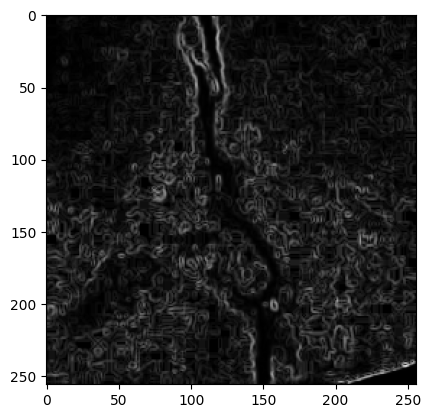

In [106]:
sobel_x = cv2.Sobel(equalized_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(equalized_image, cv2.CV_64F, 0, 1, ksize=3)
edge_image = cv2.magnitude(sobel_x, sobel_y)
plt.imshow(edge_image,cmap = 'gray')

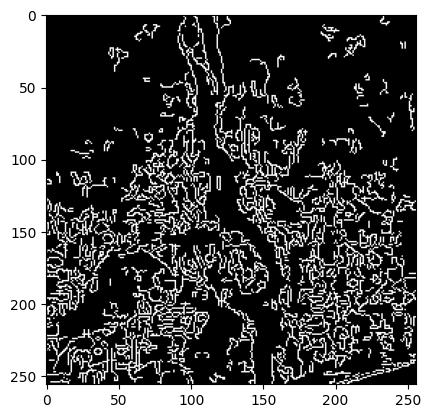

In [82]:
edges = cv2.Canny(equalized_image, 100, 200)
plt.imshow(edges,cmap = 'gray')

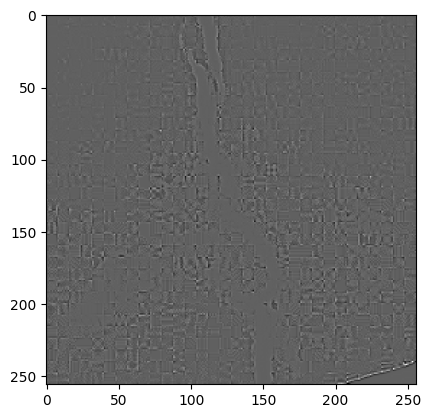

In [87]:
laplacian = cv2.Laplacian(equalized_image, cv2.CV_64F)
plt.imshow(laplacian,cmap = 'gray')